In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skin.agent import firmAgent, networkAgent
from skin.model import skinModel
from mesa.batchrunner import BatchRunner

In [2]:
fixed_params = {
                'nFirms': 500,
                'nProducts': 100,
                'nInputs': 4, 
                'n_big_firms_percent': 10, 
                'reward_to_trigger_start_up': 1200, 
#                'attractiveness_threshold': 0.3,
                'partnership_strategy': 'conservative', 
                'success_threshold': 1000, 
                'in_out_product_percent': 10, 
                'initial_capital': 20000, 
                'Partnering': True,
                'Networking': False,
                'Start_ups': True,
                'Adj_expertise': True,
                'Adj_price': True,
                'Incr_research': True,
                'Rad_research': True,
                'width': 100,
                'height': 100,
                'max_iters': 100,
                'batch_mode': True
                }
variable_params = {'attractiveness_threshold': [0.3, 0.5, 0.7]}

# The variables parameters will be invoke along with the fixed parameters allowing for either or both to be honored.
batch_run = BatchRunner(
    skinModel,
    variable_params,
    fixed_params,
    iterations=5,
    max_steps=100,
    model_reporters = {
        "Capital": lambda m: m.rpt_capital_mean (m),
        'In partnership': lambda m: m.rpt_in_partnership (m),
        'In network': lambda m: m.rpt_in_network (m),
        'Firms': lambda m: m.rpt_firms (m),
        "Networks": lambda m: m.rpt_networks (m),     
        'Successes': lambda m: m.rpt_succeeded_firms (m),
        'Start-ups': lambda m: m.rpt_startups (m),
        'Firms selling': lambda m: m.rpt_selling_firms (m),
        'Firms trading': lambda m: m.rpt_trading_firms (m),
        'Sales': lambda m: m.rpt_sales (m),
        'Profit': lambda m: m.rpt_profit (m),
        'Rate of radical research': lambda m: m.rpt_rate_of_radical_distribution(m)          
    })
batch_run.run_all()

15it [43:26, 173.75s/it]


In [4]:
batch_out = batch_run.get_model_vars_dataframe()

In [7]:
population = batch_out.groupby('attractiveness_threshold')['Firms'].mean()

Text(0, 0.5, 'Number of Firms')

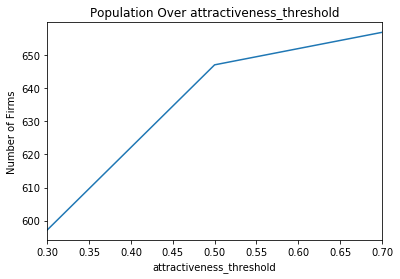

In [12]:
ax = population.plot()
ax.set_title('Population Over attractiveness_threshold')
ax.set_xlabel('attractiveness_threshold')
ax.set_ylabel('Number of Firms')
#_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [13]:
profit = batch_out.groupby('attractiveness_threshold')['Profit'].mean()

Text(0, 0.5, 'profit')

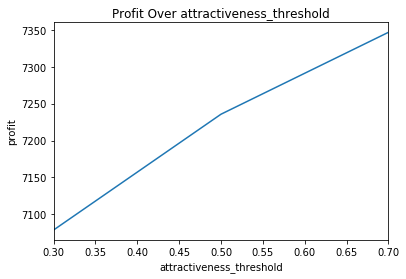

In [14]:
ax =profit.plot()
ax.set_title('Profit Over attractiveness_threshold')
ax.set_xlabel('attractiveness_threshold')
ax.set_ylabel('profit')
#_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [15]:
capital = batch_out.groupby('attractiveness_threshold')['Capital'].mean()

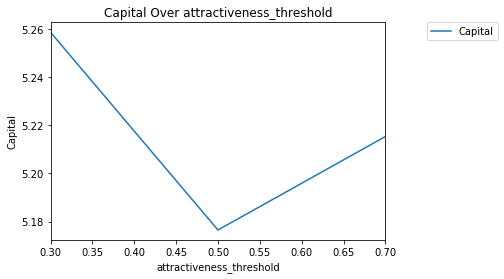

In [16]:
ax = capital.plot()
ax.set_title('Capital Over attractiveness_threshold')
ax.set_xlabel('attractiveness_threshold')
ax.set_ylabel('Capital')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))